In [7]:
import pandas as pd

# Load the CSV file using a relative path from notebooks/ to data/
df = pd.read_csv('../data/Iris.csv')

# Display first few rows
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## lets get the information about the dataset
we will use the shape parameter to get the shape of the dataset
 lets als get the columns and their data types.

In [8]:
df.shape


(150, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


 ## Quick statistical summary of the dataset
 describe() function gives a good picture of the distribution of data.

In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## check for mising values

In [11]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## check for duplicates
drop_duplicates() method helps in removing duplicates from the data frame.
the results show  that there are only three unique species

In [12]:
data = df.drop_duplicates(subset= "Species")
data 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


## check for balance in the data set

In [13]:
df.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## DATA  VISUALIZATION

We will us matplotlib  and seaborn library for data visualizatiom.



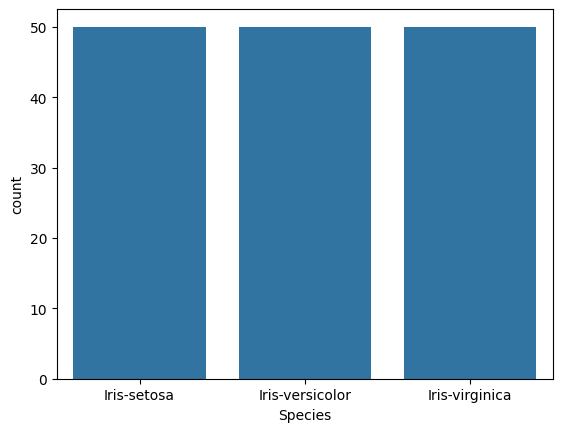

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='Species', data=df,)

plt.show()

## relation between variables

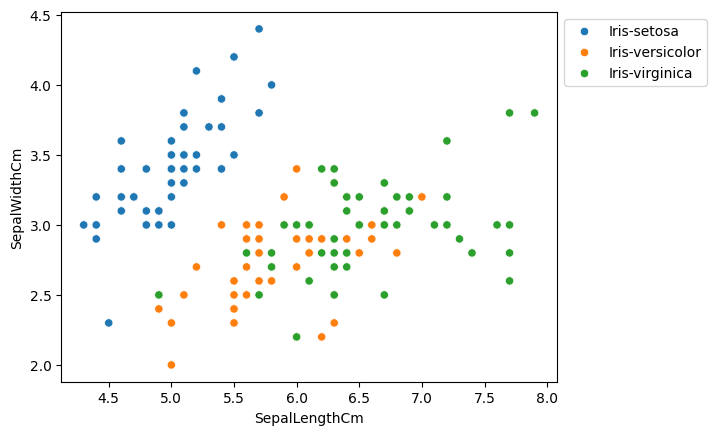

In [15]:
import seaborn as sns

sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm",
               hue='Species',data=df,)

#place the legend outside the figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

## Analysis of this is :
- Species Setosa has smaller sepal lengths but larger sepal widths.
- Versicolor Species lies in the middle of the other two species in terms of sepal length and width
- Species Virginica has larger sepal lengths but smaller sepal widths.

## petal length to petal width

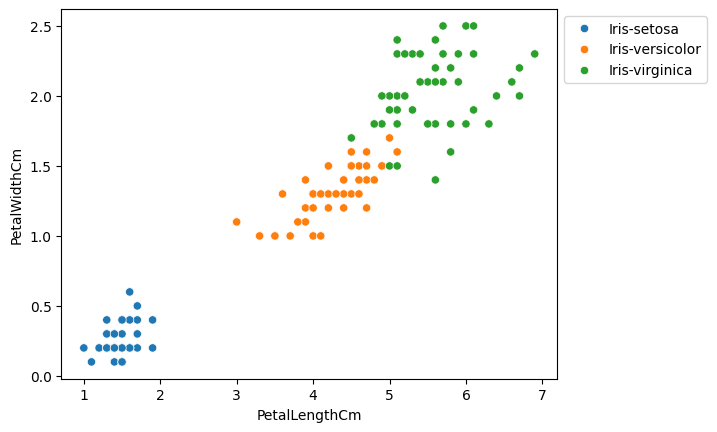

In [16]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',
                hue='Species',data=df)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

## From the above plot, we can infer that - 

- Species Setosa has smaller petal lengths and widths.
- Versicolor Species lies in the middle of the other two species in terms of petal length and width
- Species Virginica has the largest of petal lengths and widths.

## Multivariate analyis
this is to analyze data sets with multiple variables, aiming to understand the relationships and patterns between them.

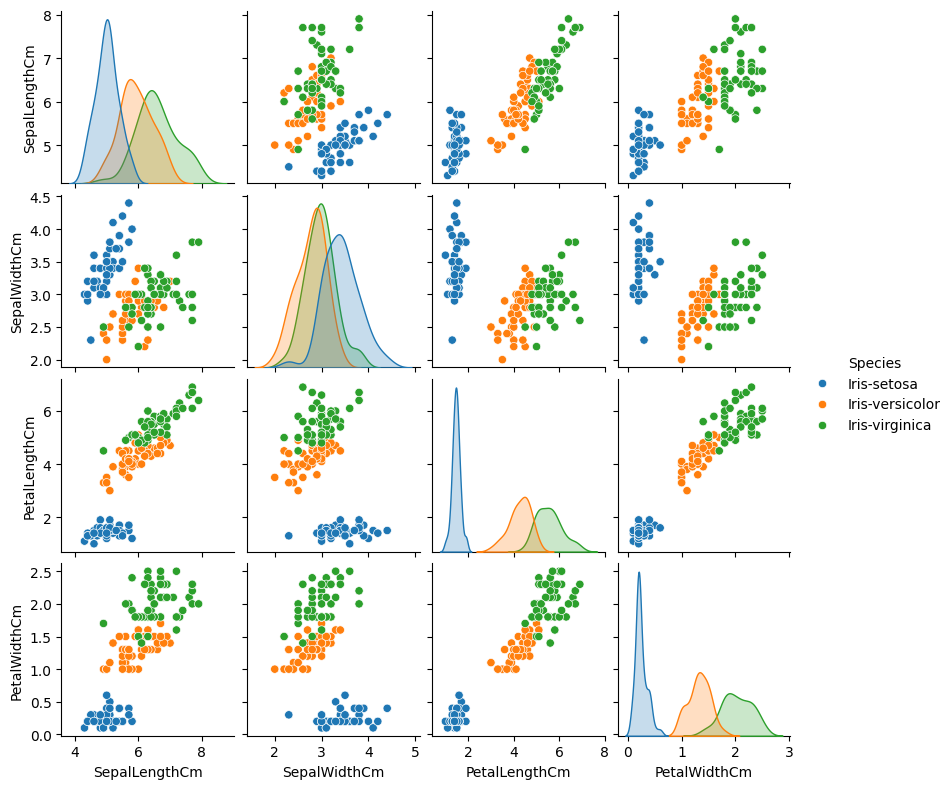

In [17]:
sns.pairplot(df.drop(['Id'], axis=1),
             hue='Species', height=2)

## We can see many types of relationships
species Setosa has the smallest of petals widths and lengths. It also has the smallest sepal length but larger sepal widths. Such information can be gathered about any other species.

# Histograms

Histograms allow seeing the distribution of data for various columns. It can be used for uni as well as bi-variate analysis.

(array([48.,  2., 15., 37., 25., 23.]),
 array([0.1, 0.5, 0.9, 1.3, 1.7, 2.1, 2.5]),
 <BarContainer object of 6 artists>)

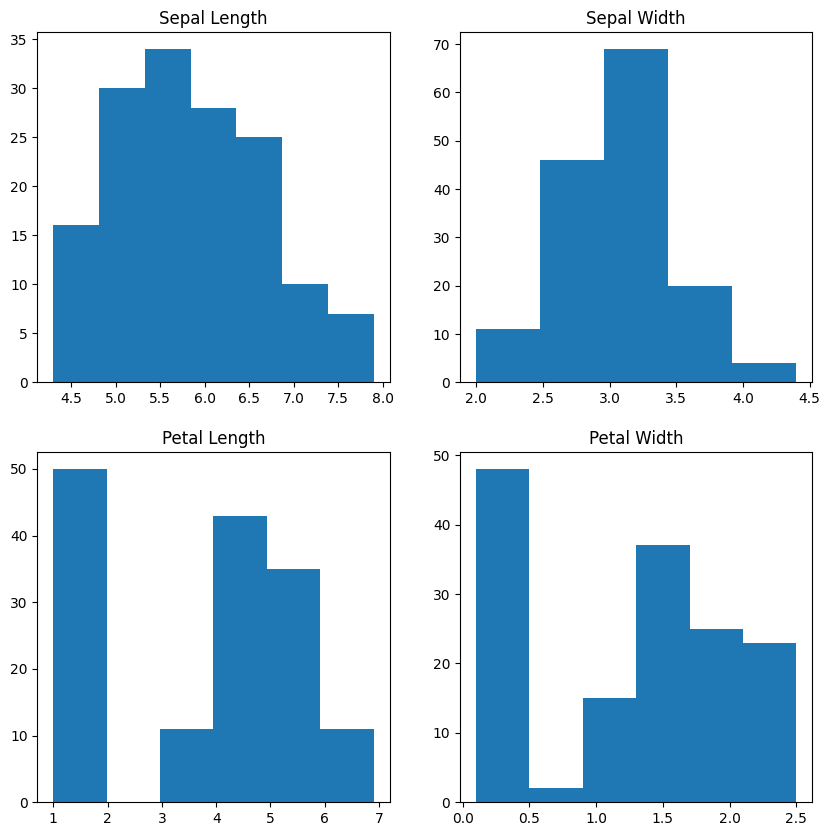

In [18]:

import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['SepalLengthCm'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['SepalWidthCm'], bins=5)

axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['PetalLengthCm'], bins=6)

axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['PetalWidthCm'], bins=6)

# Histograms with Distplot Plot
Distplot is used basically for the univariant set of observations and visualizes it through a histogram i.e. only one observation and hence we choose one particular column of the dataset.

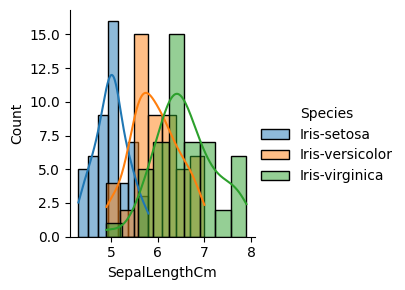

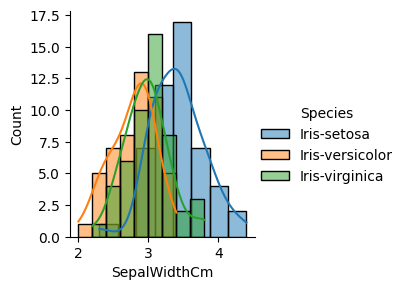

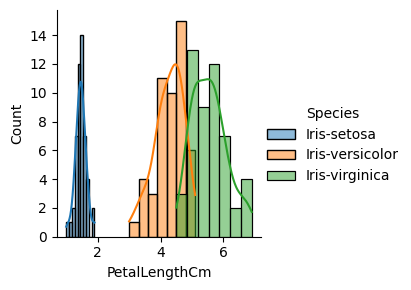

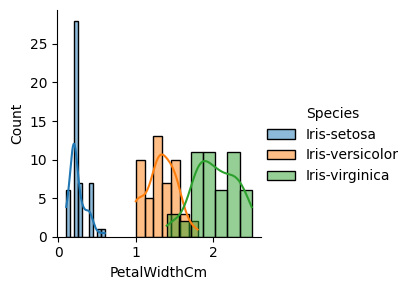

In [19]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# Sepal Length Distribution
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.histplot, "SepalLengthCm", kde=True).add_legend()

# Sepal Width Distribution
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.histplot, "SepalWidthCm", kde=True).add_legend()

# Petal Length Distribution
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.histplot, "PetalLengthCm", kde=True).add_legend()

# Petal Width Distribution
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.histplot, "PetalWidthCm", kde=True).add_legend()

# Show the plots
plt.show()


## Conclusions from the above  plots

- In the case of Sepal Length, there is a huge amount of overlapping.
- In the case of Sepal Width also, there is a huge amount of overlapping.
- In the case of Petal Length, there is a very little amount of overlapping.
- In the case of Petal Width also, there is a very little amount of overlapping.
- So we can use Petal Length and Petal Width as the classification feature.

# Handling Correlation
- A correlation measures the strength and direction of the relationship between two variables. 
- Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. 
- Any NA values are automatically excluded. 
- For any non-numeric data type columns in the dataframe it is ignored

In [20]:
data.select_dtypes(include=["number"]).corr(method="pearson")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.624413,-0.654654,0.969909,0.999685
SepalLengthCm,0.624413,1.000000,-0.999226,0.795795,0.643817
SepalWidthCm,-0.654654,-0.999226,1.000000,-0.818999,-0.673417
PetalLengthCm,0.969909,0.795795,-0.818999,1.000000,0.975713
PetalWidthCm,0.999685,0.643817,-0.673417,0.975713,1.000000


## heatmaps

we will use a heatmap to visualize the correlations.
- it is going to analyze the dataset as colors in two dimension
- shows correlation  between all numerical variables in the dataset


<Axes: >

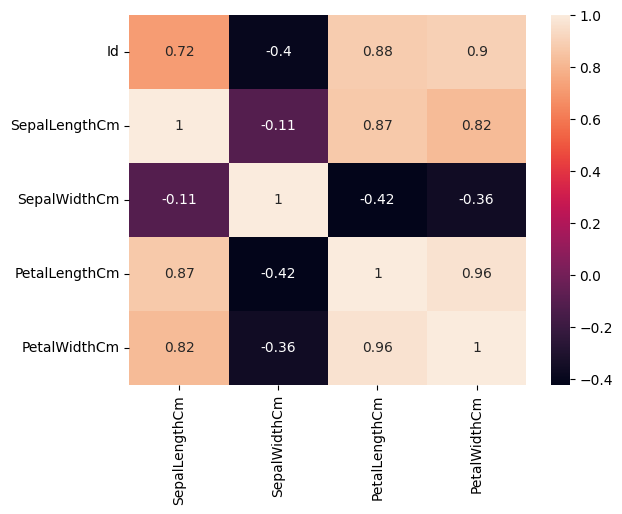

In [21]:
sns.heatmap(df.select_dtypes(include=["number"]).corr(method="pearson").drop(["Id"], axis=1), annot=True)

- Petal Length and petal length have high correlations. 
- Petal length and sepal width have good correlations.
- Petal Width and Sepal length have good correlations.

# Box Plots
we can use boxplots to see the categorical value as ditributed with other numerical values
- it summarizes the  distribution of a dataset
- visualizes the  distribution
- identify the outliers
- compare  distribution  across diffferent  groups
- understand skewness



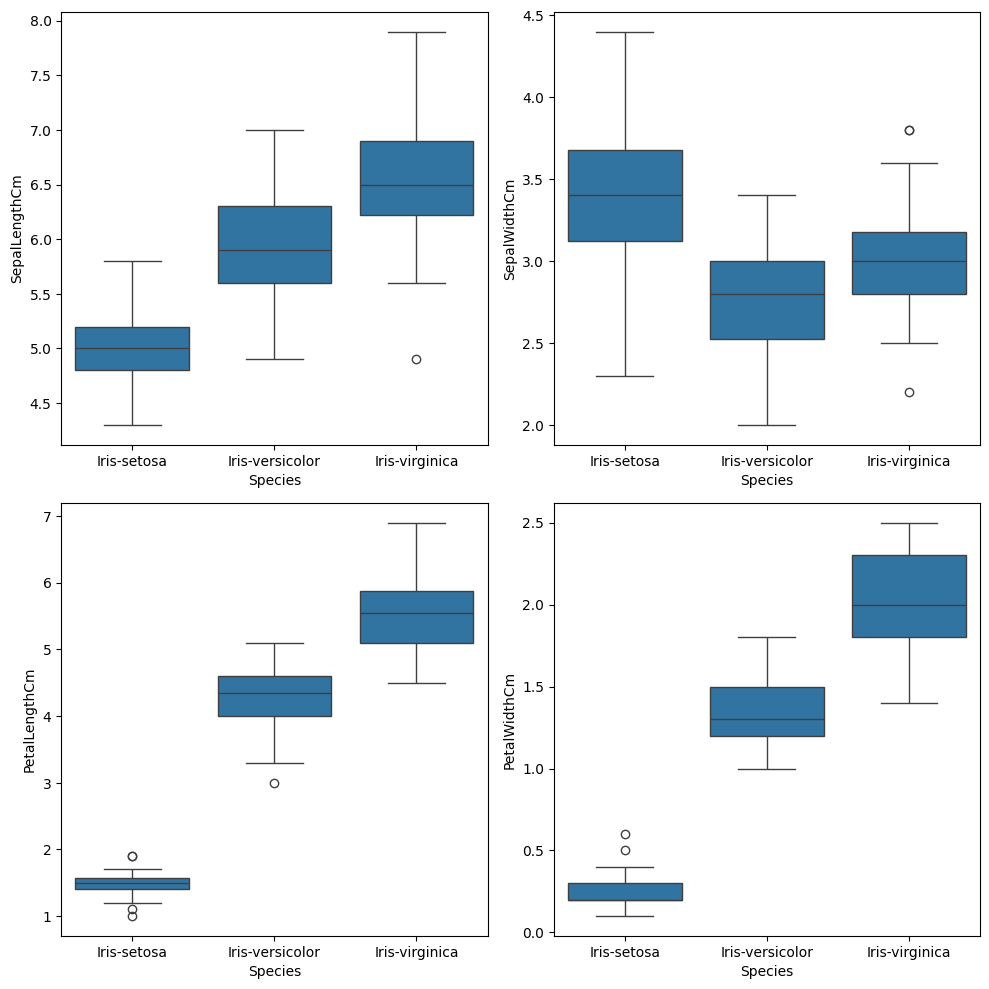

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt



def graph(y):
    sns.boxplot(x="Species", y=y, data=df)

# Creates a new figure window with desired size
plt.figure(figsize=(10,10))

# Add each subplot and call the graph function with respective feature
plt.subplot(221)
graph('SepalLengthCm')

plt.subplot(222)
graph('SepalWidthCm')

plt.subplot(223)
graph('PetalLengthCm')

plt.subplot(224)
graph('PetalWidthCm')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show all plots
plt.show()


# From the above graph, we can see that - 

- Species Setosa has the smallest features and less distributed with some outliers.
- Species Versicolor has the average features.
- Species Virginica has the highest features

# Handling Ouliers

There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s dataframe.

Once detected, you have options depending on the situation:
| **Strategy**          | **Use When**                                                             |
|:---------------------|:------------------------------------------------------------------------|
| **Remove the outliers** | They’re due to data entry errors or measurement errors                  |
| **Cap (Winsorize)**     | You want to limit extreme values but not remove them                    |
| **Transform the data**  | Data is highly skewed, and outliers distort analysis                    |
| **Leave them as-is**    | Outliers are legitimate extreme values you want to preserve             |





<Axes: xlabel='SepalWidthCm'>

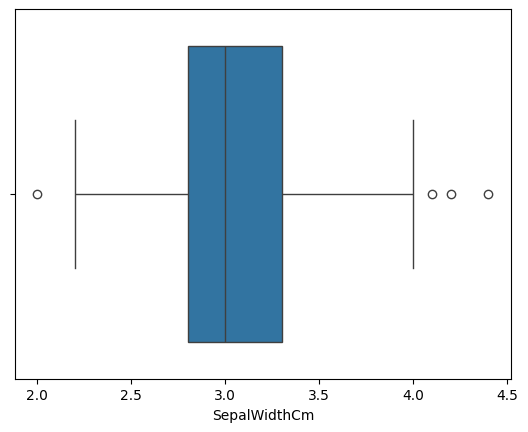

In [23]:


sns.boxplot(x='SepalWidthCm', data=df)

## the values above 4 and below 2 are acting as outliers.

For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

## Interquartile Range (IQR)

**IQR** stands for *Interquartile Range* — it measures the spread of the middle 50% of your data.

###  Formula:

Where:

- **Q1** = 25th percentile (first quartile)
- **Q3** = 75th percentile (third quartile)

#### IQR = Q3 - Q1

## How to Detect Outliers with IQR

Any data point is considered an outlier if it falls outside the following range:

- **Lower bound**:

Lower bound = Q1 - 1.5 × IQR


- **Upper bound**:

Upper bound = Q3 + 1.5 × IQR



In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Iris.csv')

# Calculate IQR
Q1 = df['SepalWidthCm'].quantile(0.25)
Q3 = df['SepalWidthCm'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[(df['SepalWidthCm'] >= (Q1 - 1.5 * IQR)) & (df['SepalWidthCm'] <= (Q3 + 1.5 * IQR))]

print("New Shape:", df.shape)

# Plot boxplot
sns.boxplot(x='SepalWidthCm', data=df)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Iris.csv'